# 영화 리뷰 분류: 이진 분류 예제 - 은닉 유닛 갯수 차이 비교

## 1. IMDB 데이터셋

In [13]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

# 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
# 드물게 나타나는 단어는 무시함
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

## 2. 데이터 준비(one-hot encoding)

In [14]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. 신경망 모델 만들기

### 3.1. 은닉 유닛을 16개 사용할 경우

In [16]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_1.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

### 3.2. 은닉 유닛을 32개 사용할 경우

In [17]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_2 = models.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))


# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

### 3.3. 은닉 유닛을 64개 사용할 경우

In [18]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_3.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

### 3.4. 은닉 유닛을 64개 사용할 경우 + tanh 활성화 함수 사용

In [19]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model_4.add(layers.Dense(64, activation='tanh'))
model_4.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_4.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

### 3.5. 은닉 유닛을 64개 사용할 경우 + MSE 손실 함수 사용

In [20]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_5 = models.Sequential()
model_5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_5.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.mean_squared_error,
                metrics=[metrics.binary_accuracy])

### 3.6. 은닉 유닛을 64개 사용할 경우 + MSE 손실 함수 사용 + tanh 활성화 함수 사용

In [21]:
#  모델 정의하기
from keras import metrics
from keras import losses
from keras import optimizers
from keras import models
from keras import layers

model_6 = models.Sequential()
model_6.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model_6.add(layers.Dense(64, activation='tanh'))
model_6.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일하기
# 옵티마이저 설정 & 손실과 측정을 함수 객체로 지정
model_6.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.mean_squared_error,
                metrics=[metrics.binary_accuracy])

## 4. 훈련 검증

In [22]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_1 = model_1.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_2 = model_2.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_3 = model_3.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_4 = model_4.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_5 = model_5.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history_6 = model_6.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5032 - binary_accuracy: 0.7934 - val_loss: 0.3724 - val_binary_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2988 - binary_accuracy: 0.9050 - val_loss: 0.3110 - val_binary_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2175 - binary_accuracy: 0.9294 - val_loss: 0.2812 - val_binary_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1720 - binary_accuracy: 0.9443 - val_loss: 0.2768 - val_binary_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1371 - binary_accuracy: 0.9570 - val_loss: 0.2854 - val_binary_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1156 - binary_accuracy: 0.9655 - val_loss: 0.3045 - val_binary_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

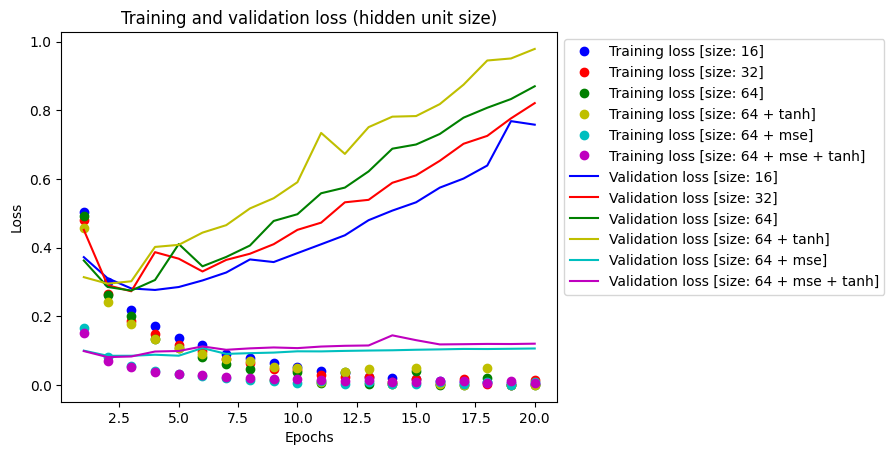

In [23]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict_1 = history_1.history
history_dict_2 = history_2.history
history_dict_3 = history_3.history
history_dict_4 = history_4.history
history_dict_5 = history_5.history
history_dict_6 = history_6.history

loss_1 = history_dict_1['loss']
loss_2 = history_dict_2['loss']
loss_3 = history_dict_3['loss']
loss_4 = history_dict_4['loss']
loss_5 = history_dict_5['loss']
loss_6 = history_dict_6['loss']
val_loss_1 = history_dict_1['val_loss']
val_loss_2 = history_dict_2['val_loss']
val_loss_3 = history_dict_3['val_loss']
val_loss_4 = history_dict_4['val_loss']
val_loss_5 = history_dict_5['val_loss']
val_loss_6 = history_dict_6['val_loss']

epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, 'bo', label='Training loss [size: 16]')                # bo: 파란색 점
plt.plot(epochs, loss_2, 'ro', label='Training loss [size: 32]')                # ro: 빨간색 점
plt.plot(epochs, loss_3, 'go', label='Training loss [size: 64]')                # go: 초록색 점
plt.plot(epochs, loss_4, 'yo', label='Training loss [size: 64 + tanh]')         # yo: 노란색 점
plt.plot(epochs, loss_5, 'co', label='Training loss [size: 64 + mse]')          # co: 청록색 점
plt.plot(epochs, loss_6, 'mo', label='Training loss [size: 64 + mse + tanh]')   # mo: 심홍색 점

plt.plot(epochs, val_loss_1, 'b', label='Validation loss [size: 16]')               # b: 파란색 실선
plt.plot(epochs, val_loss_2, 'r', label='Validation loss [size: 32]')               # r: 빨간색 실선
plt.plot(epochs, val_loss_3, 'g', label='Validation loss [size: 64]')               # g: 초록색 실선
plt.plot(epochs, val_loss_4, 'y', label='Validation loss [size: 64 + tanh]')        # y: 노란색 실선
plt.plot(epochs, val_loss_5, 'c', label='Validation loss [size: 64 + mse]')         # c: 청록색 실선
plt.plot(epochs, val_loss_6, 'm', label='Validation loss [size: 64 + mse + tanh]')  # m: 심홍색 실선

plt.title('Training and validation loss (hidden unit size)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

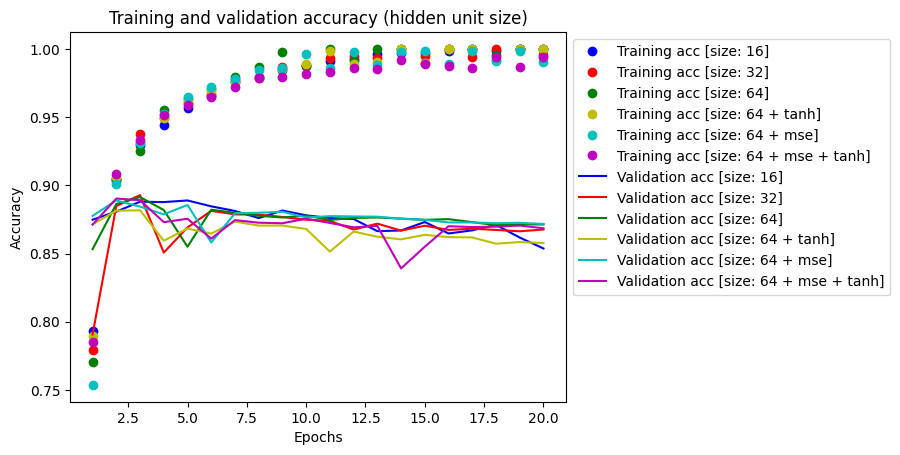

In [24]:
plt.clf()

acc_1 = history_dict_1['binary_accuracy']
acc_2 = history_dict_2['binary_accuracy']
acc_3 = history_dict_3['binary_accuracy']
acc_4 = history_dict_4['binary_accuracy']
acc_5 = history_dict_5['binary_accuracy']
acc_6 = history_dict_6['binary_accuracy']
val_acc_1 = history_dict_1['val_binary_accuracy']
val_acc_2 = history_dict_2['val_binary_accuracy']
val_acc_3 = history_dict_3['val_binary_accuracy']
val_acc_4 = history_dict_4['val_binary_accuracy']
val_acc_5 = history_dict_5['val_binary_accuracy']
val_acc_6 = history_dict_6['val_binary_accuracy']

plt.plot(epochs, acc_1, 'bo', label='Training acc [size: 16]')
plt.plot(epochs, acc_2, 'ro', label='Training acc [size: 32]')
plt.plot(epochs, acc_3, 'go', label='Training acc [size: 64]')
plt.plot(epochs, acc_4, 'yo', label='Training acc [size: 64 + tanh]')
plt.plot(epochs, acc_5, 'co', label='Training acc [size: 64 + mse]')
plt.plot(epochs, acc_6, 'mo', label='Training acc [size: 64 + mse + tanh]')

plt.plot(epochs, val_acc_1, 'b', label='Validation acc [size: 16]')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc [size: 32]')
plt.plot(epochs, val_acc_3, 'g', label='Validation acc [size: 64]')
plt.plot(epochs, val_acc_4, 'y', label='Validation acc [size: 64 + tanh]')
plt.plot(epochs, val_acc_5, 'c', label='Validation acc [size: 64 + mse]')
plt.plot(epochs, val_acc_6, 'm', label='Validation acc [size: 64 + mse + tanh]')

plt.title('Training and validation accuracy (hidden unit size)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()